# FB 08 - F-Praktikum Physik Materialien - 57 Magnetic Resonance

## Fourier Transform and its application in NMR

In this section, the basics of the Fourier Transform (FT) are introduced with simple words. For more detailed descriptions, please check this nice book with animations https://www.cis.rit.edu/htbooks/nmr/chap-5/chap-5.htm#5.3 .

### Bridge between domains

We are used to the time domain. 
When looking at a signal, we often plot its amplitude over time, like Fig.(50Hz-example)(a). 
<!-- . In Fig.(50Hz-example)(a), we show a sine-wave signal which can be described by  -->
<!-- $s(t) = \sin(2\pi\times50\,t + \frac{\pi}{4})\,.$ -->
However, when dealing with periodic signals (which is very frequent in NMR/MRI experiments), it is easier if we view signals in the **frequency domain**. 

What is frequency domain? Since we know in time domain we plot "signal amplitudes at different times", then we can already infer that, in frequency domain we plot "signal amplitudes at different frequencies". For the signal we show in Fig.(50Hz-example)(a), it would be simply described as a 50-Hz signal (with an  initial phase) in the frequency domain [see Fig.(50Hz-example)(b)]. The bridge between two domains is the Fourier transform. 

**Figure: 50Hz-example**

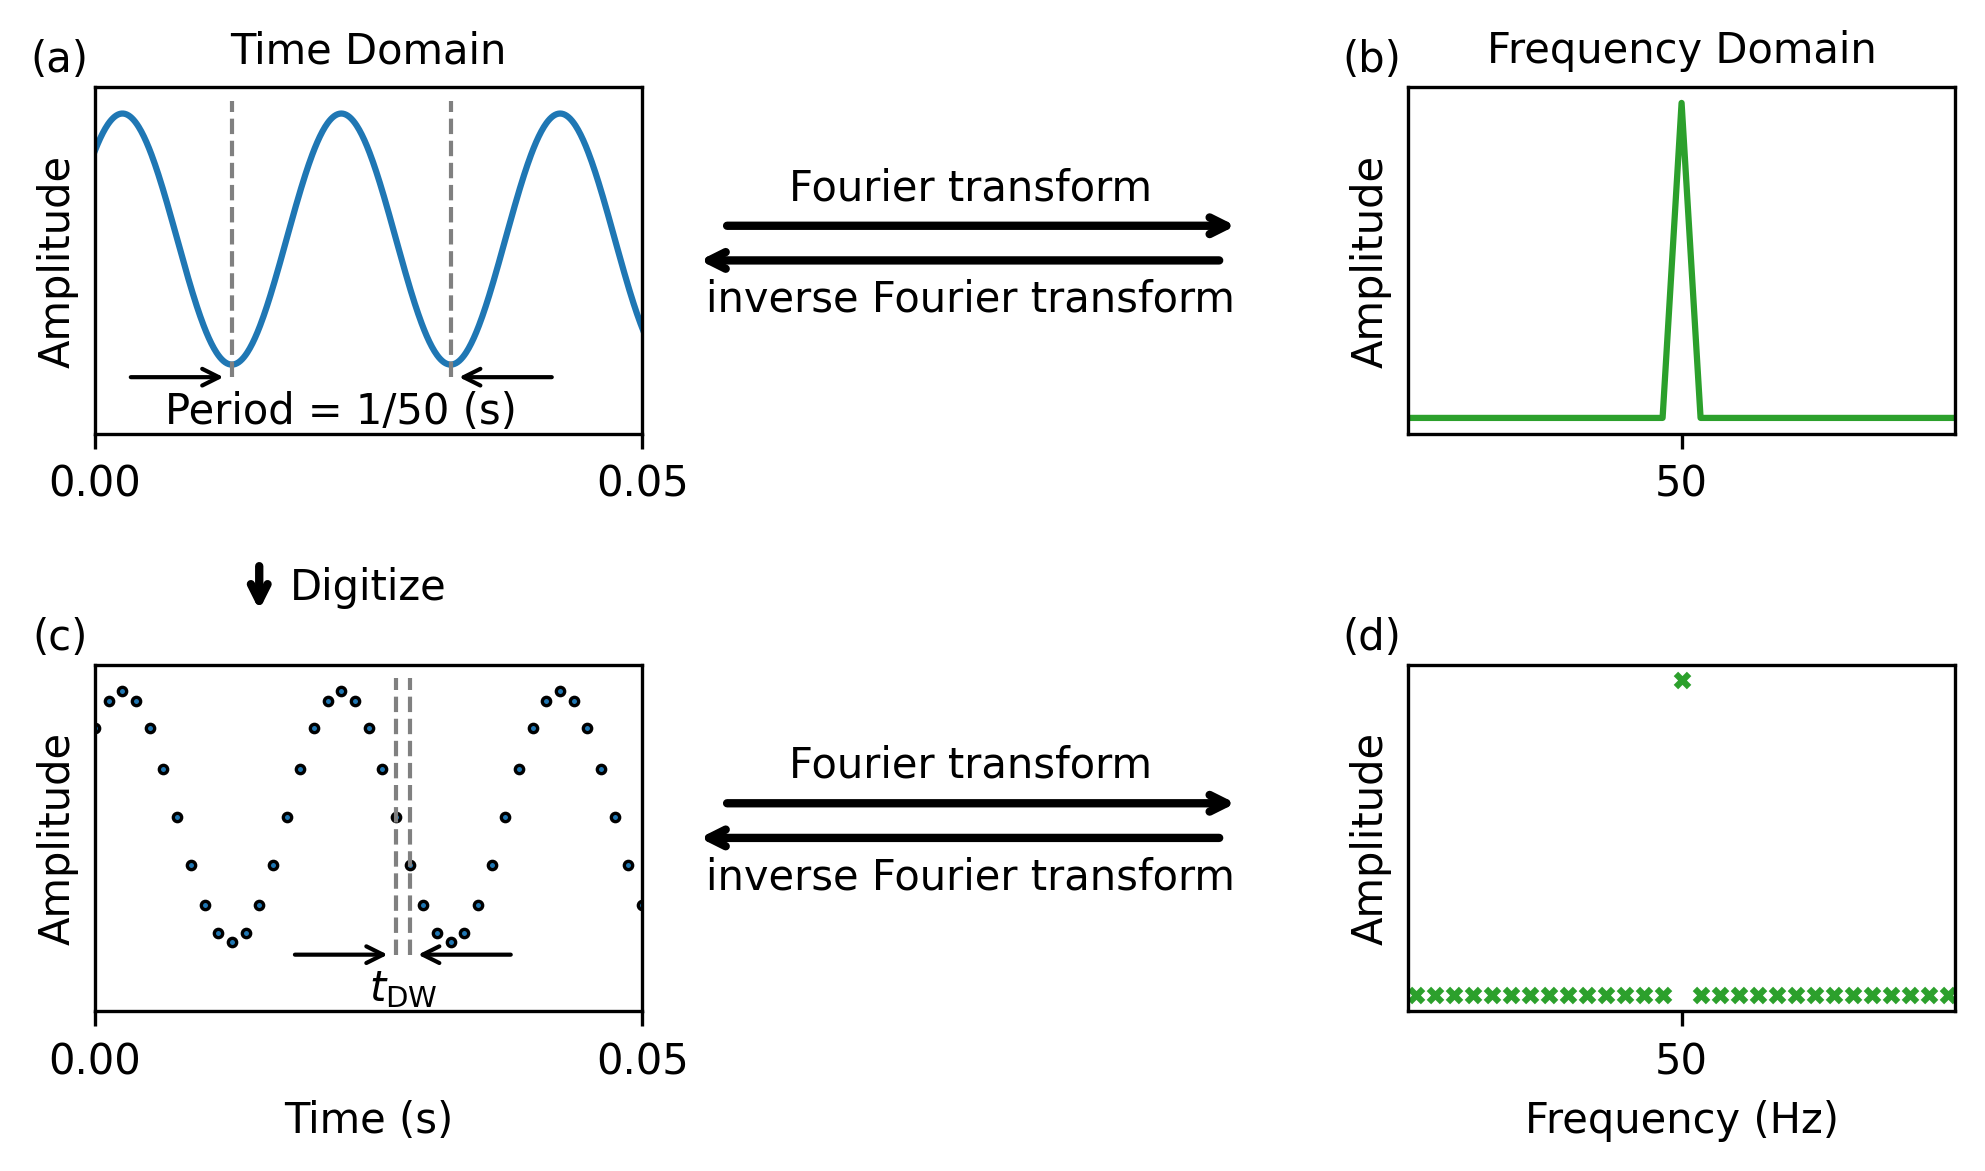

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Time-domain parameters
DW = 1 / 800 /16 # dwell time
SI = 256 * 16 # size i.e. number of sampled points
timeStamp_smooth = DW * np.arange(SI)
initial_phase = np.pi / 4
s_t_smooth = np.sin(2 * np.pi * 50 * timeStamp_smooth + initial_phase)

# Time-domain parameters
DW = 1 / 800  # dwell time
SI = 128  # size i.e. number of sampled points
timeStamp = DW * np.arange(SI)
initial_phase = np.pi / 4
s_t = np.sin(2 * np.pi * 50 * timeStamp + initial_phase)

# Frequency-domain computation
n = len(s_t)
frequencies = np.fft.fftfreq(n, d=DW)
fft_vals = np.fft.fft(s_t)
fft_vals_shifted = np.fft.fftshift(fft_vals)
frequencies_shifted = np.fft.fftshift(frequencies)

fft_amplitudes = np.abs(fft_vals_shifted)
phase = np.angle(fft_vals_shifted)

# Plotting setup
plt.rc("font", size=10)  # font size for all figures
plt.rc("figure", titlesize=10)  # Figure title
plt.rc("axes", titlesize=10)  # Axes title

fig = plt.figure(figsize=(8, 4.), dpi=300)  # initialize a figure
gs = gridspec.GridSpec(
    nrows=3, ncols=3, width_ratios=[1, 1, 1], height_ratios=[1, 0.5, 1]
)  # create grid for multiple figures

# fix the margins
wspace = 0.2
hspace = 0.1
fig.subplots_adjust(wspace=wspace, hspace=hspace)
ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])
ax02 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 0])
ax11 = fig.add_subplot(gs[1, 1])
ax12 = fig.add_subplot(gs[1, 2])
ax20 = fig.add_subplot(gs[2, 0])
ax21 = fig.add_subplot(gs[2, 1])
ax22 = fig.add_subplot(gs[2, 2])
axs = [ax00, ax01, ax02, ax10, ax11, ax12, ax20, ax21, ax22]

# --- Left plot: Time-domain signal ---
axs[0].plot(timeStamp_smooth, s_t_smooth, color="tab:blue")

arrow_left = (2 * np.pi * 0 + 3 * np.pi / 2 - initial_phase) / (2 * np.pi * 50)
arrow_right = (2 * np.pi * 0 + 2 * np.pi + 3 * np.pi / 2 - initial_phase) / (
    2 * np.pi * 50
)

axs[0].vlines(
    x=arrow_left, ymin=-1.1, ymax=1.1, color="grey", linestyle="--", linewidth=1
)
axs[0].vlines(
    x=arrow_right, ymin=-1.1, ymax=1.1, color="grey", linestyle="--", linewidth=1
)

axs[0].annotate(
    "",
    xy=(arrow_left, -1.1),
    xytext=(arrow_left - 0.01, -1.1),
    arrowprops=dict(arrowstyle="->", lw=1),
)
axs[0].annotate(
    "",
    xy=(arrow_right, -1.1),
    xytext=(arrow_right + 0.01, -1.1),
    arrowprops=dict(arrowstyle="->", lw=1),
)
axs[0].text(
    (arrow_left + arrow_right) / 2, -1.2, "Period = 1/50 (s)", ha="center", va="top"
)

axs[0].set_xticks([0, 0.05])
# axs[0].set_yticks([-1, 0, 1])
axs[0].set_yticks([])
axs[0].set_title("Time Domain")
# axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")
axs[0].set_xlim(0, 0.05)
axs[0].set_ylim(bottom=-1.55)

# --- Middle plots: Arrow with transform labels ---
for ax in [axs[1], axs[7]]:
    ax.axis("off")
    # Fourier transform
    ax.text(0.4, 0.65, "Fourier transform", ha="center", va="bottom")
    ax.annotate(
        "", xy=(0.9, 0.6), xytext=(-0.06, 0.6), arrowprops=dict(arrowstyle="->", lw=2)
    )
    # inverse Fourier transform
    ax.text(0.4, 0.45, "inverse Fourier transform", ha="center", va="top")
    ax.annotate(
        "", xy=(0.87, 0.5), xytext=(-0.11, 0.5), arrowprops=dict(arrowstyle="<-", lw=2)
    )

# --- Right plot: Frequency-domain representation ---
axs[2].plot(
    frequencies_shifted,
    fft_amplitudes,
    # marker="x",
    color="tab:green",
    label="Amplitude",
)
axs[2].set_xticks([50])
# axs[2].set_yticks([0, 60])
axs[2].set_yticks([])
axs[2].set_xlim(-40, 140)
# axs[2].set_xlabel("Frequency (Hz)")
axs[2].set_ylabel("Amplitude")
axs[2].set_title("Frequency Domain")

# # Add phase on a twin y-axis
# ax2 = axs[2].twinx()
# ax2.plot(frequencies_shifted, phase, "r--", label="Phase")
# ax2.set_ylabel("Phase [rad]", color="red")
# ax2.tick_params(axis="y", labelcolor="red")


for ax in [axs[3]]:
    ax.axis("off")
    ax.annotate(
        "", xy=(0.3, 0.1), xytext=(0.3, 0.45), arrowprops=dict(arrowstyle="->", lw=2)
    )
    ax.text(0.5, 0.4, "Digitize", ha="center", va="top")

axs[4].axis("off")
axs[5].axis("off")

# --- Left plot: digital time-domain signal ---
axs[6].scatter(
    timeStamp,
    s_t,
    color="tab:blue",
    edgecolors="k",
    linewidths=0.8,
    marker="o",
    s=4,
)

vline_left = (2 * np.pi * 1 + 1 * np.pi - initial_phase) / (2 * np.pi * 50) 
vline_right = vline_left + DW

axs[6].vlines(
    x=vline_left, ymin=-1.1, ymax=1.1, color="grey", linestyle="--", linewidth=1
)
axs[6].vlines(
    x=vline_right, ymin=-1.1, ymax=1.1, color="grey", linestyle="--", linewidth=1
)

axs[6].annotate(
    "",
    xy=(vline_left, -1.1),
    xytext=(vline_left - 0.01, -1.1),
    arrowprops=dict(arrowstyle="->", lw=1),
)
axs[6].annotate(
    "",
    xy=(vline_right, -1.1),
    xytext=(vline_right + 0.01, -1.1),
    arrowprops=dict(arrowstyle="->", lw=1),
)
axs[6].text(
    (vline_left + vline_right) / 2,
    -1.2,
    "$t_\\mathrm{DW}$",
    ha="center",
    va="top",
)

axs[6].set_xticks([0, 0.05])
# axs[0].set_yticks([-1, 0, 1])
axs[6].set_yticks([])
# axs[6].set_title("Time Domain")
axs[6].set_xlabel("Time (s)")
axs[6].set_ylabel("Amplitude")
axs[6].set_xlim(0, 0.05)
axs[6].set_ylim(bottom=-1.55)

# --- Right plot: Frequency-domain representation ---
axs[8].scatter(
    frequencies_shifted,
    fft_amplitudes,
    marker="x",
    s=10,
    color="tab:green",
    label="Amplitude",
)
axs[8].set_xticks([50])
# axs[2].set_yticks([0, 60])
axs[8].set_yticks([])
axs[8].set_xlim(-40, 140)
axs[8].set_xlabel("Frequency (Hz)")
axs[8].set_ylabel("Amplitude")
# axs[8].set_title("Frequency Domain")

# # Add phase on a twin y-axis
# ax2 = axs[2].twinx()
# ax2.plot(frequencies_shifted, phase, "r--", label="Phase")
# ax2.set_ylabel("Phase [rad]", color="red")
# ax2.tick_params(axis="y", labelcolor="red")

letters = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "(i)"]
for i, ax in enumerate([axs[0], axs[2], axs[6], axs[8]]):
    # xleft, xright = ax.get_xlim()
    # ybottom, ytop = ax.get_ylim()
    ax.text(
        -0.013,
        1.02,
        s=letters[i],
        transform=ax.transAxes,
        ha="right",
        va="bottom",
        color="k",
    )

plt.show()

### Sampling

Nowadays, we mostly get digital signals from devices, instead of analog ones. Digital signals are discrete. They are usually obtained by sampling the readout by a constant dwell time. An example of digital signal sampled by dwell time $t_\mathrm{DW}$ is shown in Fig.(50Hz-example)(c). We also use sampling rate $\nu_\mathrm{samp} = 1/t_\mathrm{DW}$ to quantify the sampling. When transformed to the frequency domain, the signal is also discrete. 

One natural question is: how to choose an appropriate sampling rate $\nu_\mathrm{sampling}$ given the signal frequency $\nu_\mathrm{sig}$? We can answer this question by considering a few scenarios: (1) small sampling rate ($\nu_\mathrm{samp} \ll \nu_\mathrm{sig}$), (2) moderate sampling rate $\nu_\mathrm{samp} \geq \nu_\mathrm{sig}$ and (3) large sampling rate ($\nu_\mathrm{samp} \gg \nu_\mathrm{sig}$). 




more to read: [https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem]


It cannot be very small due to the limitation of hardware. Then, the question is, what is the minimum value for an appropriate dwell time? 



[  7  30 100]


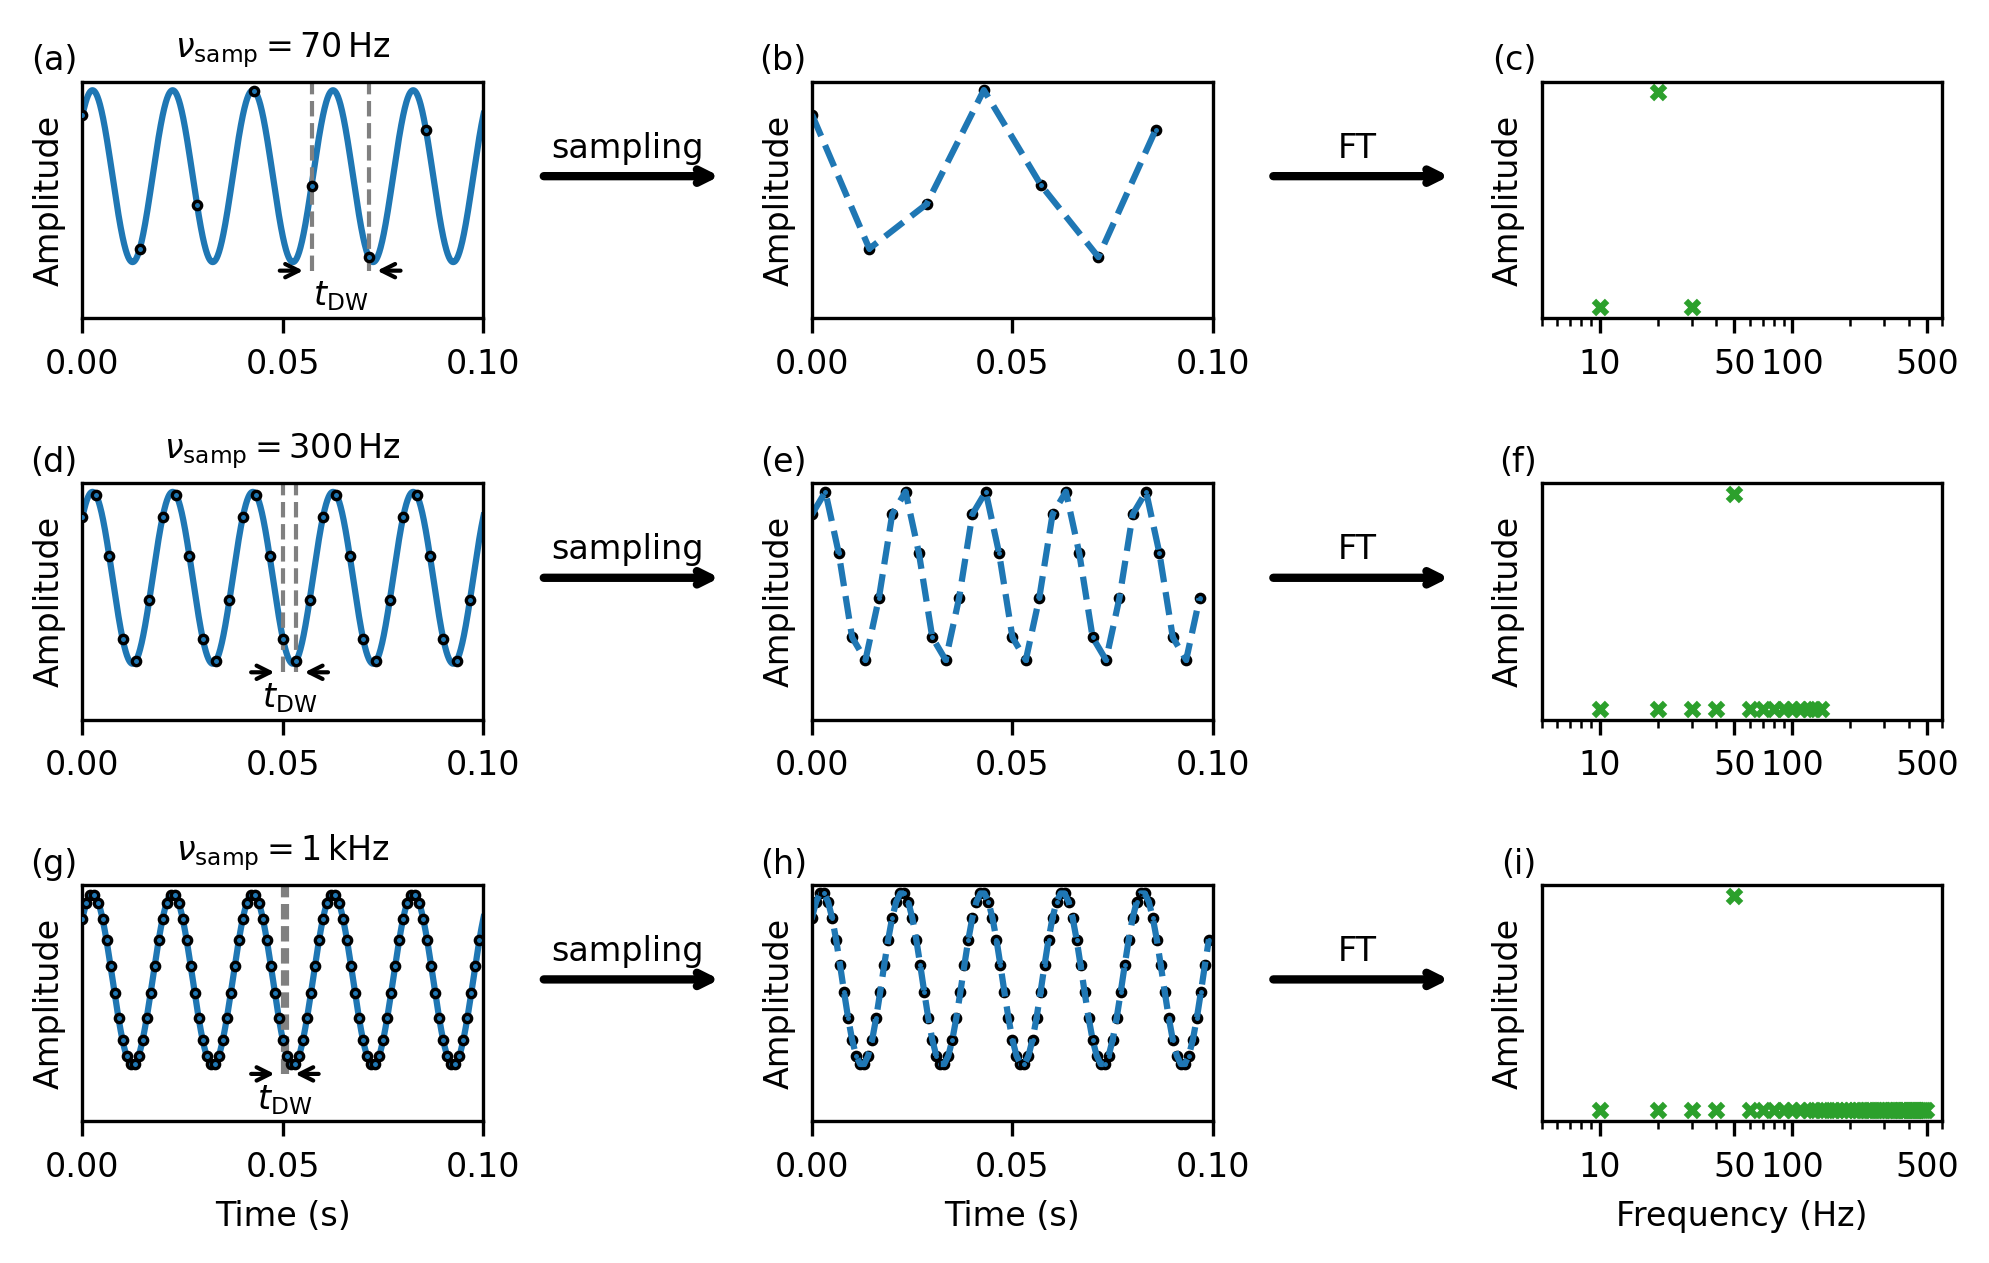

In [17]:
# plot for the sampling section
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Time-domain parameters
DW = 1 / 800 / 16  # dwell time
SI = 256 * 16  # size i.e. number of sampled points
timeStamp_smooth = DW * np.arange(SI)
initial_phase = np.pi / 4
s_t_smooth = np.sin(2 * np.pi * 50 * timeStamp_smooth + initial_phase)


# Plotting setup
plt.rc("font", size=8)  # font size for all figures
plt.rc("figure", titlesize=8)  # Figure title
plt.rc("axes", titlesize=8)  # Axes title

nrows, ncols = (3, 5)
fig = plt.figure(figsize=(8, 4.5), dpi=300)  # initialize a figure
gs = gridspec.GridSpec(
    nrows=nrows, ncols=ncols, width_ratios=[1, 0.5, 1, 0.5, 1], height_ratios=[1, 1, 1]
)  # create grid for multiple figures

# fix the margins
wspace = 0.2
hspace = 0.7
fig.subplots_adjust(wspace=wspace, hspace=hspace)
axs = []
for i in range(nrows):
    axs.append([])
    for j in range(ncols):
        axs[-1].append(fig.add_subplot(gs[i, j]))
axs = np.array(axs)


# --- Left plots: Time-domain signal ---
titles = [
    "small sampling rate\n$\\nu_\\mathrm{samp}=70\\,\\mathrm{Hz}$",
    "Moderate sampling rate\n$\\nu_\\mathrm{samp}=300\\,\\mathrm{Hz}$",
    "Large sampling rate\n$\\nu_\\mathrm{samp}=1\\,\\mathrm{kHz}$",
]
titles = [
    "$\\nu_\\mathrm{samp}=70\\,\\mathrm{Hz}$",
    "$\\nu_\\mathrm{samp}=300\\,\\mathrm{Hz}$",
    "$\\nu_\\mathrm{samp}=1\\,\\mathrm{kHz}$",
]
DWs = np.array([1 / 70, 1 / 300, 1 / 1000])  # dwell time
SIs = np.round(0.1 / DWs).astype(int)  # size i.e. number of sampled points
print(SIs)
# SI = 1024  # size i.e. number of sampled points
# timeStamp = DW * np.arange(SI)
initial_phase = np.pi / 4
# s_t = np.sin(2 * np.pi * 50 * timeStamp + initial_phase)

for i, ax in enumerate(list(axs[:, 0])):
    ax.plot(timeStamp_smooth, s_t_smooth, color="tab:blue")
    # discrete
    timeStamp = DWs[i] * np.arange(SIs[i])
    initial_phase = np.pi / 4
    s_t = np.sin(2 * np.pi * 50 * timeStamp + initial_phase)
    ax.scatter(
        timeStamp,
        s_t,
        color="tab:blue",
        edgecolors="k",
        linewidths=0.8,
        marker="o",
        s=4,
        zorder=5,
    )
    ax.set_xticks([0, 0.05, 0.10])
    # axs[0].set_yticks([-1, 0, 1])
    ax.set_yticks([])
    ax.set_title(titles[i])
    ax.set_ylabel("Amplitude")
    ax.set_xlim(0, 0.1)
    ax.set_ylim(bottom=-1.65)
    vline_left_index = np.argmin(np.abs(timeStamp - 0.05))
    vline_right_index = vline_left_index + 1
    vline_left = timeStamp[vline_left_index]
    vline_right = timeStamp[vline_right_index]
    ax.vlines(
        x=vline_left, ymin=-1.1, ymax=1.1, color="grey", linestyle="--", linewidth=1
    )
    ax.vlines(
        x=vline_right, ymin=-1.1, ymax=1.1, color="grey", linestyle="--", linewidth=1
    )
    ax.annotate(
        "",
        xy=(vline_left, -1.1),
        xytext=(vline_left - 0.01, -1.1),
        arrowprops=dict(arrowstyle="->", lw=1),
    )
    ax.annotate(
        "",
        xy=(vline_right, -1.1),
        xytext=(vline_right + 0.01, -1.1),
        arrowprops=dict(arrowstyle="->", lw=1),
    )
    ax.text(
        (vline_left + vline_right) / 2,
        -1.2,
        "$t_\\mathrm{DW}$",
        ha="center",
        va="top",
    )
axs[-1, 0].set_xlabel("Time (s)")


# --- Middle left plots: Arrow with transform labels ---
mid_left_ind = 1
for i, ax in enumerate(
    [axs[0, mid_left_ind], axs[1, mid_left_ind], axs[2, mid_left_ind]]
):
    ax.axis("off")
    # Fourier transform
    ax.text(0.4, 0.65, "sampling", ha="center", va="bottom")
    ax.annotate(
        "", xy=(0.9, 0.6), xytext=(-0.06, 0.6), arrowprops=dict(arrowstyle="->", lw=2)
    )

# --- Middle plots: discrete signals ---
mid_ind = 2
for i, ax in enumerate([axs[0, mid_ind], axs[1, mid_ind], axs[2, mid_ind]]):
    timeStamp = DWs[i] * np.arange(SIs[i])
    initial_phase = np.pi / 4
    s_t = np.sin(2 * np.pi * 50 * timeStamp + initial_phase)
    ax.scatter(
        timeStamp,
        s_t,
        color="tab:blue",
        edgecolors="k",
        linewidths=0.8,
        marker="o",
        s=4,
    )
    ax.plot(timeStamp, s_t, "--")
    ax.set_xticks([0, 0.05, 0.10])
    # axs[0].set_yticks([-1, 0, 1])
    ax.set_yticks([])
    # ax.set_title("Discrete signal")
    ax.set_ylabel("Amplitude")
    ax.set_xlim(0, 0.1)
    ax.set_ylim(bottom=-1.65)
axs[2, mid_ind].set_xlabel("Time (s)")

# --- Middle right plots: Arrow with transform labels ---
mid_right_ind = 3
for i, ax in enumerate(
    [axs[0, mid_right_ind], axs[1, mid_right_ind], axs[2, mid_right_ind]]
):
    ax.axis("off")
    # Fourier transform
    ax.text(0.4, 0.65, "FT", ha="center", va="bottom")
    ax.annotate(
        "", xy=(0.9, 0.6), xytext=(-0.06, 0.6), arrowprops=dict(arrowstyle="->", lw=2)
    )


# --- Right plot: Frequency-domain representation ---
right_ind = ncols - 1
for i, ax in enumerate([axs[0, right_ind], axs[1, right_ind], axs[2, right_ind]]):
    # axs[2].plot(
    #     frequencies_shifted,
    #     amplitude,
    #     # marker="x",
    #     color="tab:green",
    #     label="Amplitude",
    # )
    # discrete
    timeStamp = DWs[i] * np.arange(SIs[i])
    s_t = np.sin(2 * np.pi * 50 * timeStamp + initial_phase)
    # Frequency-domain computation
    n = len(s_t)
    frequencies = np.fft.fftfreq(n, d=DWs[i])
    fft_vals = np.fft.fft(s_t)
    fft_vals_shifted = np.fft.fftshift(fft_vals)
    frequencies_shifted = np.fft.fftshift(frequencies)

    fft_amplitudes = np.abs(fft_vals_shifted)
    phase = np.angle(fft_vals_shifted)

    ax.scatter(
        frequencies_shifted[1:],
        fft_amplitudes[1:],
        marker="x",
        s=10,
        color="tab:green",
        label="Amplitude",
    )
    # ax.set_xticks([50])
    # axs[2].set_yticks([0, 60])
    ax.set_yticks([])
    # ax.set_xlim(left=-1, right=np.amax(frequencies_shifted)+1)

    ax.set_ylabel("Amplitude")
    # ax.set_title("Frequency spectrum")
    ax.set_xscale("log")
    ax.set_xticks([10, 50, 100, 500])
    ax.set_xticklabels(["10", "50", "100", "500"])
    ax.set_xlim(5, 600)
axs[2, right_ind].set_xlabel("Frequency (Hz)")
# axs[1, right_ind].set_xticks([0, 50, 100, 150])
# axs[2, right_ind].set_xticks([0, 50, 250, 500])

# letters = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "(i)", "(j)", "(f)", "(g)", "(h)", "(i)"]
for i, ax in enumerate(axs[0, 0:5:2]):
    # xleft, xright = ax.get_xlim()
    # ybottom, ytop = ax.get_ylim()
    ax.text(
        -0.013,
        1.02,
        s="(" + chr(i + ord("a")) + ")",
        transform=ax.transAxes,
        ha="right",
        va="bottom",
        color="k",
    )
for i, ax in enumerate(axs[1, 0:5:2]):
    # xleft, xright = ax.get_xlim()
    # ybottom, ytop = ax.get_ylim()
    ax.text(
        -0.013,
        1.02,
        s="(" + chr(i + ord("d")) + ")",
        transform=ax.transAxes,
        ha="right",
        va="bottom",
        color="k",
    )
for i, ax in enumerate(axs[2, 0:5:2]):
    # xleft, xright = ax.get_xlim()
    # ybottom, ytop = ax.get_ylim()
    ax.text(
        -0.013,
        1.02,
        s="(" + chr(i + ord("g")) + ")",
        transform=ax.transAxes,
        ha="right",
        va="bottom",
        color="k",
    )

plt.show()


### (appendix) Math of discrete Fourier transform



For a time-domain signal of length $N$ $x = [x_0, x_1, ..., x_{N-1}]^\top$, its discrete Fourier transform (DFT) is:
$$
X_k = \sum_{n=0}^{N-1} x_n \cdot \exp\left(-2\pi i \frac{k}{N} n \right), \quad k = 0, 1, ..., N-1
$$

This can be written as:

$$
\mathbf{X} = \mathbf{F} \cdot \mathbf{x},
$$

where **$\mathbf{F}$** is the **DFT matrix** with elements:

$$
F_{k,n} = \exp\left(-2\pi i\frac{ k}{N} n \right)\,,
$$

or

$$
F = \begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & \omega & \omega^2 & \cdots & \omega^{N-1} \\
1 & \omega^2 & \omega^4 & \cdots & \omega^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega^{N-1} & \omega^{2(N-1)} & \cdots & \omega^{(N-1)(N-1)}
\end{bmatrix}\,,
$$
where $\omega = e^{-2\pi i / N}$. 

Therefore, the DFT can be written as:
$$
\mathbf{X} = \mathbf{F} \cdot \mathbf{x} = 
\begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & \omega & \omega^2 & \cdots & \omega^{N-1} \\
1 & \omega^2 & \omega^4 & \cdots & \omega^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega^{N-1} & \omega^{2(N-1)} & \cdots & \omega^{(N-1)(N-1)}
\end{bmatrix}
\begin{bmatrix}
x_0  \\
x_1 \\
x_2  \\
\vdots \\
x_{N-1}
\end{bmatrix}
=
\begin{bmatrix}
X_0  \\
X_1 \\
X_2  \\
\vdots \\
X_{N-1}
\end{bmatrix}
\,.
$$

Here we do not dig deep into the rabbit hole of mathmathicas, but rather focus on the physical meaning of the formula. 

If we assume that $\mathbf{x} =\{x_n\}$ is a sine-wave signal
$$
x_n = \cos(2\pi f n)\,,\,f=0, \quad n = 0, 1, ..., 7
$$
<!-- \frac{1}{8}, \frac{1}{4}\text{ or } \frac{3}{8}\,, -->
we will find that when frequency $f=0$, only $X_0$ in $\mathbf{X}$ is non-zero. This means that $X_0$, computed by $[1,\,\cdots,\,1][x_0,\,\cdots,\,x_{N-1}]^\top$, indicates the amplitude of $f=0$ component in the signal. 

You can try to compute the values of $\mathbf{X}$ when $f=\frac{1}{8}, \frac{1}{4}\text{ or } \frac{3}{8}$, then you can find out which elements in $\mathbf{X}$ correspond to the amplitude of signals of these frequencies. A quick conclusion we can find in this example is that, the calculation of the Fourier transform is extracting the amplitudes of signals of different frequencies. 

Questions to think yourself: 

1. If $x_n = \cos(2\pi f n+\phi)$, what do we get with the Fourier transform? (It is about phase). 
2. What do we get when $f$ is different from the values mentioned above? Discuss cases where $f<=1/2$ and when $f>1/2$. 

TODO:

a TLDR part? A summary at the beginning? 

simple text on 1D MRI. 

2D MRI in the appendix. this should be arranged in a clean and robust way

highlight the key points of the lab course. spend less text on indirectly-related text

key points include: zeeman (not important after students know Zeeman gives the signal), larmor frequency, RCF, T1 and T2, FT with simple words (less formulas. students need to 
know: what is FT? what does it do? aliasing. convolution. and more...? i do not remember. check Peter's lecture notes.)

log in world press and edit


[-0.5   -0.375 -0.25  -0.125  0.     0.125  0.25   0.375]
[-1.66533454e-16+0.00000000e+00j  1.96261557e-17+3.33644647e-16j
  3.96274378e+00-5.44666596e-01j -1.96261557e-17+3.33644647e-16j
  1.66533454e-16+0.00000000e+00j -1.96261557e-17-3.33644647e-16j
  3.96274378e+00+5.44666596e-01j  1.96261557e-17-3.33644647e-16j]


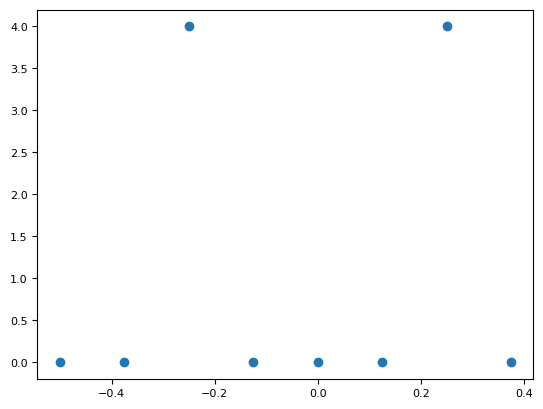

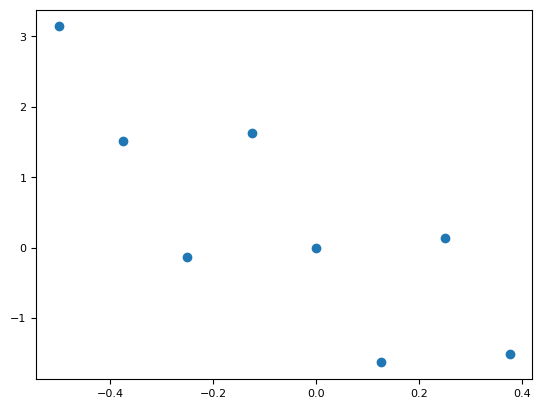

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


timeStamp = np.arange(8)

# f = 0
# f=1/8
f = 2 / 8
# f = 3 / 8
s_t = np.cos(2*np.pi*f*timeStamp+np.pi/23)


# Frequency-domain computation
n = len(s_t)
frequencies = np.fft.fftfreq(n, d=1)
fft_vals = np.fft.fft(s_t)
fft_vals_shifted = np.fft.fftshift(fft_vals)
frequencies_shifted = np.fft.fftshift(frequencies)

fft_amplitudes = np.abs(fft_vals_shifted)
phase = np.angle(fft_vals_shifted)
print(frequencies_shifted)
print(fft_vals_shifted)
plt.scatter(frequencies_shifted, fft_amplitudes)
plt.show()
plt.scatter(frequencies_shifted, phase)
plt.show()